In [11]:
import rdkit
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd

from IPython.display import HTML
def show_df(df):
    return HTML(df.to_html(notebook=True))

In [3]:
df = pd.read_csv("../Moonshot/COVID_moonshot_submissions/covid_submissions_all_info.csv", usecols=["SMILES", "CID"])

In [8]:
PandasTools.AddMoleculeColumnToFrame(df,'SMILES','Molecule',includeFingerprints=True)

[22:53:15] WARNING: not removing hydrogen atom without neighbors
[22:53:16] WARNING: not removing hydrogen atom without neighbors


# Calculating similarity with respect to a given target
I believe this molecule is the drug candidate entering clinical trials

In [13]:
target = Chem.MolFromSmiles("CO[C@@]1(C(=O)Nc2cncc3ccccc23)CCOc2ccc(Cl)cc21")

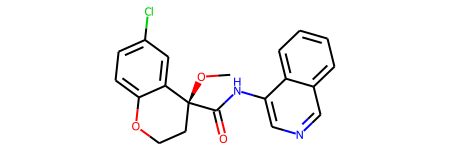

In [14]:
target

# Calculate fingerprint for each molecule in data set

In [17]:
from rdkit.DataStructs import FingerprintSimilarity

fp1 = Chem.RDKFingerprint(target)
fps = [Chem.RDKFingerprint(x) for x in df.Molecule]

# Calculate the similarity score for each molecule compared to the target
Similarity is tanimoto based on morgan fingerprint<br>
Can add this as a column to df

In [23]:
similarity_scores = []
for fp in fps:
    similarity = FingerprintSimilarity(fp1,fp)
    similarity_scores.append(similarity)

df["similarity"] = similarity_scores

,SMILES,CID,Molecule,similarity
0,N#Cc1ccccc1NC(=O)Cc1c[nH]c2ncccc12,ANT-DIA-3c79be55-1,,0.367116
1,N#Cc1ccccc1NC(=O)Cc1cccnc1,ANT-DIA-3c79be55-2,,0.274230
2,CCNc1ccc(C#N)c(NC(=O)Cc2c[nH]c3ncccc23)c1,ANT-DIA-3c79be55-3,,0.386648
3,CS(=O)(=O)Cc1ccc(C(=O)Nc2cccnc2)o1,ANT-DIA-3c79be55-4,,0.283162
4,O=C(Nc1cccnc1)c1ccc(N2CCC(O)CC2)o1,ANT-DIA-3c79be55-5,,0.313752

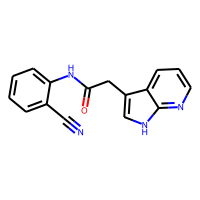
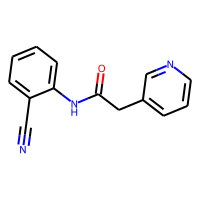
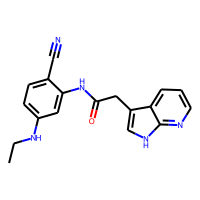
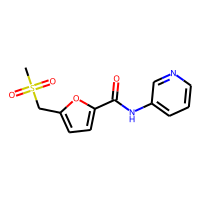
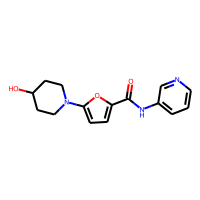

In [25]:
show_df(df.head())

# Select highest scoring mols by similarity
visualise in grid

In [58]:
#subset = df.nlargest(100, columns="similarity")
subset = df.nlargest(400, columns="similarity")[::4]

In [59]:
len(subset)

100

/home/nichrun/miniconda3/envs/PyTorchDrug/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:252: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


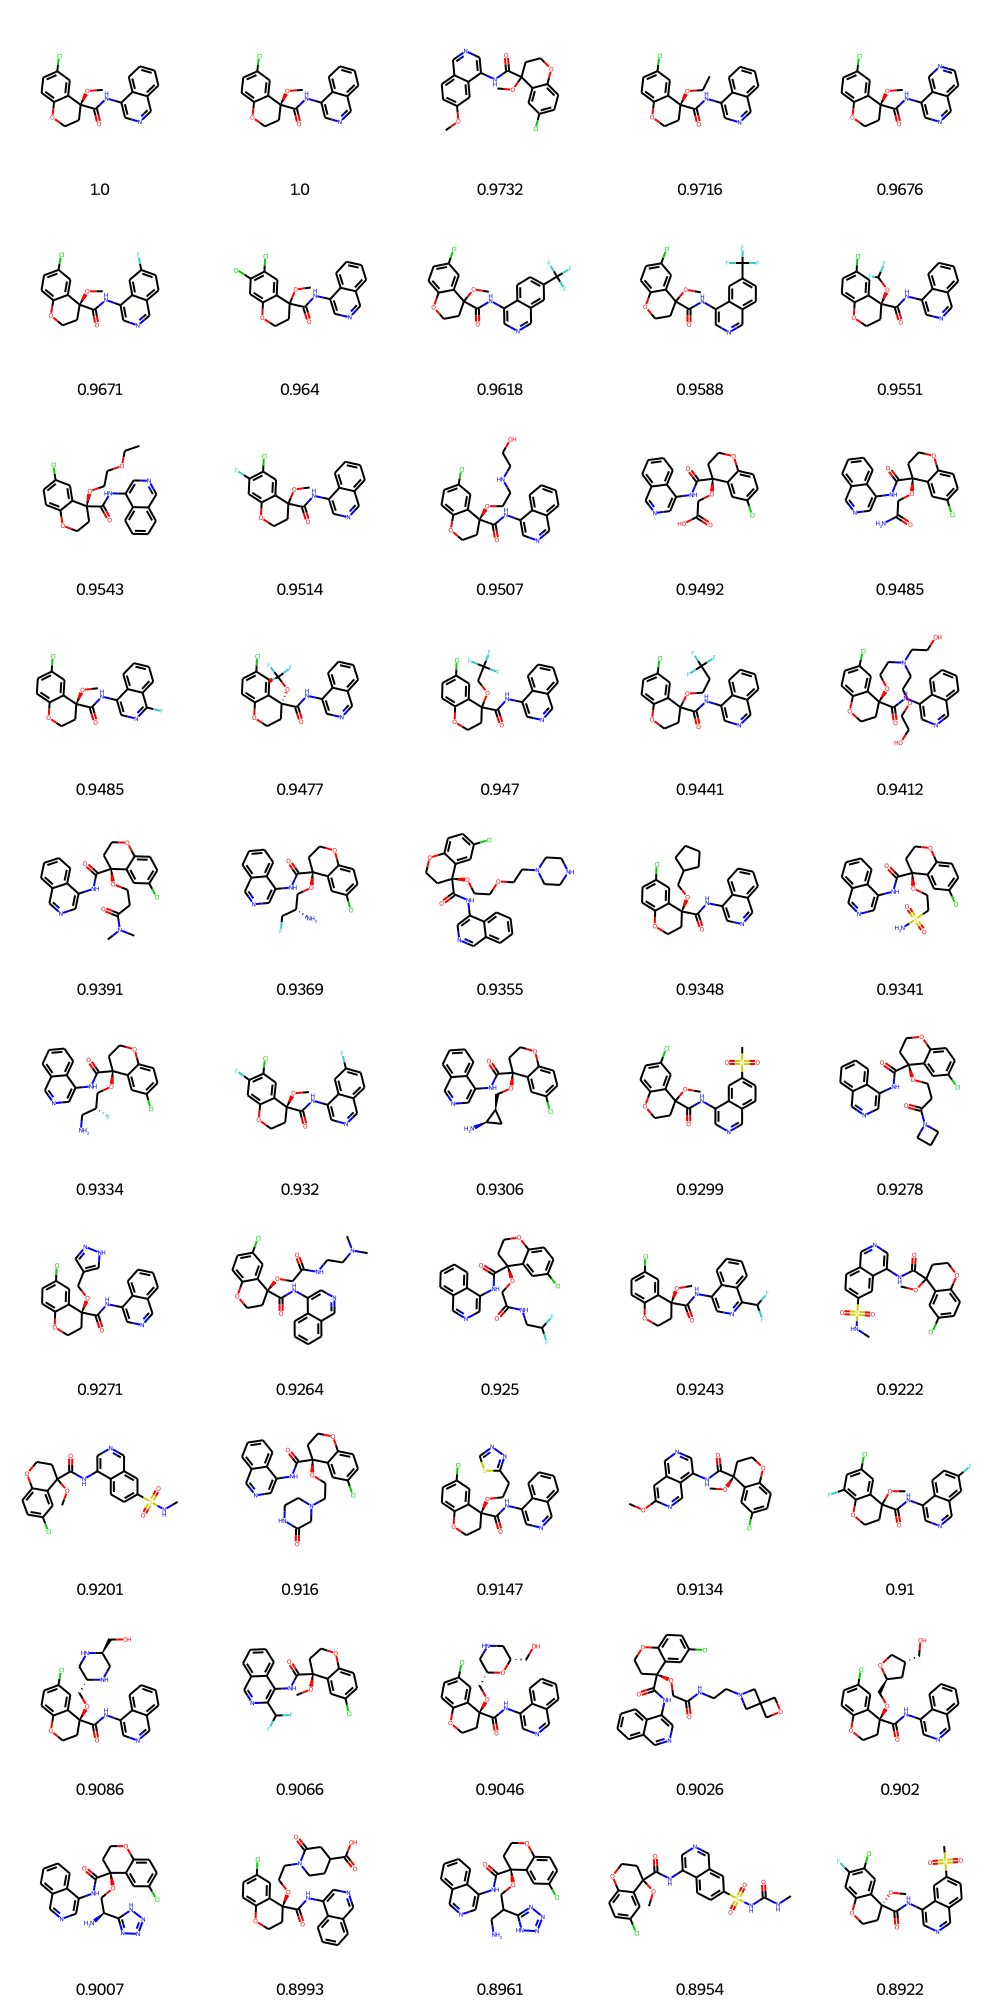

In [60]:
from rdkit.Chem import Draw
sim_string = [str(round(x, 4)) for x in list(subset["similarity"])]
Draw.MolsToGridImage(subset["Molecule"], molsPerRow=5, legends=sim_string)